In [30]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)

## Loading Data

In [31]:

players_url  <- "https://raw.githubusercontent.com/Lissiu/dsci-100-2025w1-group-008-13/refs/heads/main/data/players.csv"
sessions_url <- "https://raw.githubusercontent.com/Lissiu/dsci-100-2025w1-group-008-13/refs/heads/main/data/sessions.csv"

players <- read_csv(players_url)
sessions <- read_csv(sessions_url)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [32]:
players
sessions

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


## (1) Data Description:
### Dataset Overview

| Dataset | Description | # Observations | # Variables | Key Variable |
|----------|--------------|----------------|--------------|---------------|
| players.csv | Player demographic and skill information | 196 | 7 | hashedEmail |
| sessions.csv | Each recorded game session per player | 1535 | 5 | hashedEmail |


### players.csv — Variable Summary

| Variable | Type | Meaning |
|-----------|------|---------|
| experience | character | Player's self-reported gaming experience level (e.g., Amateur, Pro, Veteran) |
| subscribe | logical | Whether the player subscribed to the game newsletter |
| hashedEmail | character | Anonymized unique player identifier |
| played_hours | numeric | Total number of hours the player has played on the server |
| name | character | Player’s in-game name or alias |
| gender | character | Player’s gender (Agender, Male, Female, Other, Non-binary, Two-Spirited, or Prefer not to say) |
| Age | numeric | Player’s age in years (some missing values) |

---

### sessions.csv — Variable Summary

| Variable | Type | Meaning |
|-----------|------|---------|
| hashedEmail | character | Unique player ID (foreign key linking to players.csv) |
| start_time | character | Start time of a game session |
| end_time | character | End time of a game session |
| original_start_time | numeric | Original start time as a UNIX timestamp |
| original_end_time | numeric| Original end time as a UNIX timestamp |

---

### Potential Data Issues and Observations

| Category | Description | Possible Impact |
|-----------|--------------|----------------|
| Missing values | `Age` contains missing data; `gender` includes “Prefer not to say” | Could reduce sample size or introduce bias |
| Outliers | Some players have 0 or unusually high `played_hours` | May skew averages or affect regression results |
| Data type inconsistencies | `start_time` and `end_time` are stored as character, not datetime | Need conversion for time-based calculations |
| Duplicates | Players may appear multiple times in `sessions.csv` | Must aggregate sessions per player |
| Sampling bias | Data comes from a voluntary Minecraft research server | May not represent the general player population |
| Ethical considerations | All identifiers are anonymized (`hashedEmail`) | Satisfies data privacy and ethics requirements |

---


### How the Data Were Collected

The data were collected from a Minecraft research server operated by the UBC Computer Science department.  
Player information (`players.csv`) was obtained through voluntary registration forms, including demographics, experience, and newsletter subscription.  
Session data (`sessions.csv`) were automatically logged by the server, recording start and end times for each play session.  
All players were anonymized using hashed identifiers (`hashedEmail`) to ensure privacy and comply with research ethics.


### Summary Statistics for Numeric Variables in `players.csv` （Also See Part 3)

| Variable     | Min | Mean  | Median | Max   | SD   |
|---------------|------|--------|---------|--------|--------|
| Age           | 9.00 | 21.14 | 19.00 | 58.00 | 7.39 |
| played_hours  | 0.00 | 5.85  | 0.10  | 223.10 | 28.36 |


## (2) Questions

### Broad Question
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

### Specific Predictive Question
Can a combination of player features — such as **age**, **gender**, **experience level**, **total playtime**, and **average session duration (avg_session_min)** — predict whether a player will subscribe to the newsletter, and how much each factor contributes to improving prediction accuracy?

### How the Data Help
The `players.csv` dataset includes each player's demographic information (`Age`, `gender`), self-reported experience level (`experience`), total playtime (`played_hours`), and subscription status (`subscribe`).  
The `sessions.csv` dataset records detailed play sessions, from which we can calculate each player's **average session duration (`avg_session_min`)**.  
These combined data allow us to test how demographic and behavioural features, both individually and together, relate to subscription behaviour and which combinations produce the most accurate predictions.

### Data Wrangling Plan
- Use both `players.csv` and `sessions.csv` datasets.  
- Keep `subscribe` as the variable we aim to predict.  
- Use `Age`, `gender`, `experience`, `played_hours`, and `avg_session_min` as predictors, testing different feature combinations.  
- Handle missing values (e.g., missing `Age` or incomplete session data) and ensure all categorical variables are properly encoded.  
- Convert `experience` to a factor variable for classification.  
- Calculate `avg_session_min` from session data as:
  $$
  avg\_session\_min = \frac{end\_time - start\_time}{\text{number of sessions}}
  $$
- Split the final dataset into **training (75%)** and **testing (25%)** sets, and compare model performance to identify which feature combination best predicts subscription.


## (3) Exploratory Data Analysis and Visualization:
### 1. Data Loading and Tidying
The `players.csv` dataset was successfully loaded into R and converted into a tidy format, where each row represents one player and each column represents a variable.  
Only minimal wrangling was performed to ensure consistent data types (e.g., converting `experience` and `gender` into factors).

In [33]:
## Minimal Data Wrangling to Create Tidy Datasets

players_tidy <- players |>
  mutate(
    experience    = as.factor(experience),
    gender        = as.factor(gender))



sessions_tidy <- sessions |>
  mutate(
    start_time  = dmy_hm(start_time, quiet = TRUE),
    end_time    = dmy_hm(end_time, quiet = TRUE),
    duration_min = as.numeric(difftime(end_time, start_time, units = "mins")))


players_tidy
sessions_tidy



experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time,duration_min
<chr>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00,1.71977e+12,1.71977e+12,12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00,1.71867e+12,1.71867e+12,13
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00,1.72193e+12,1.72193e+12,23
⋮,⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-28 15:36:00,2024-07-28 15:57:00,1.72218e+12,1.72218e+12,21
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-25 06:15:00,2024-07-25 06:22:00,1.72189e+12,1.72189e+12,7
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-20 02:26:00,2024-05-20 02:45:00,1.71617e+12,1.71617e+12,19


In [34]:
# calculating the means of Age average session duration and played_hours
mean_Age <- mean(players$Age, na.rm = TRUE)
mean_played_hours <- mean(players$played_hours, na.rm = TRUE)

mean_values <- data.frame(
  Variable = c("Age", "played_hours"),
  Mean = round(c(mean_Age, mean_played_hours), 2))


mean_values

Variable,Mean
<chr>,<dbl>
Age,21.14
played_hours,5.85


experience,subscribe,hashedEmail,played_hours,name,gender,Age,avg_session_min,session_count
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,74.77778,27
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,85.00000,3
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,5.00000,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57,5.00000,1
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,29.83333,6
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA,15.00000,1


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


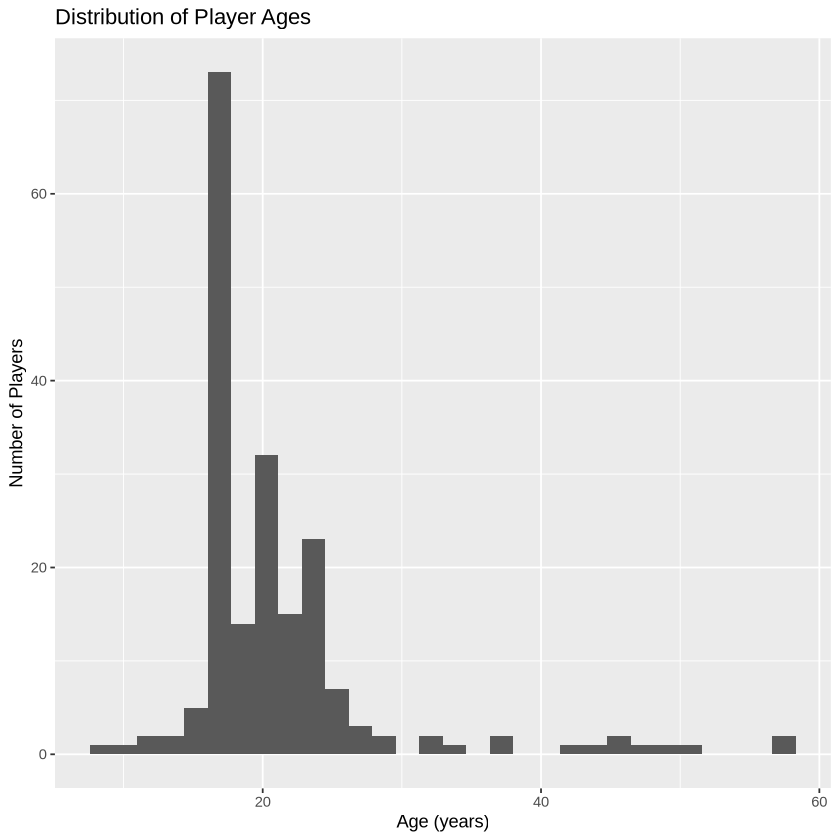

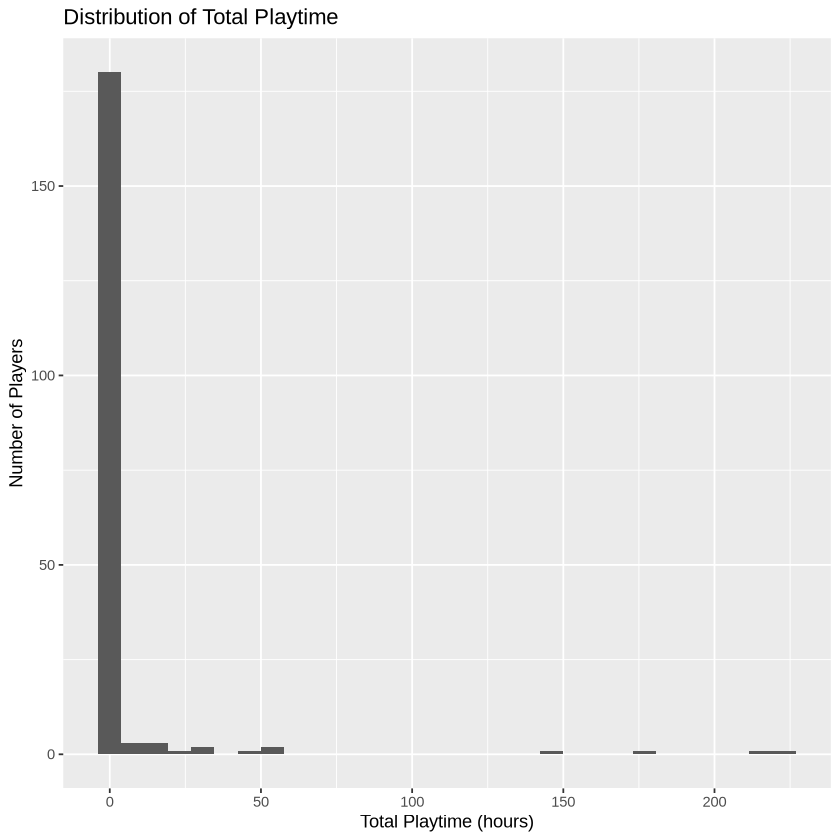

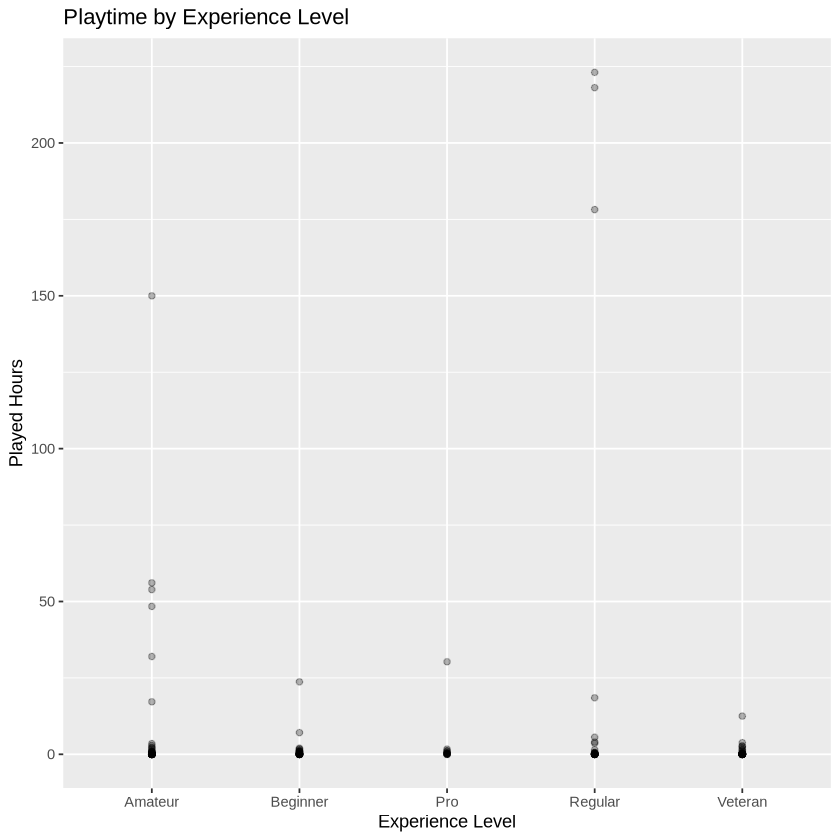

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_col()`).”


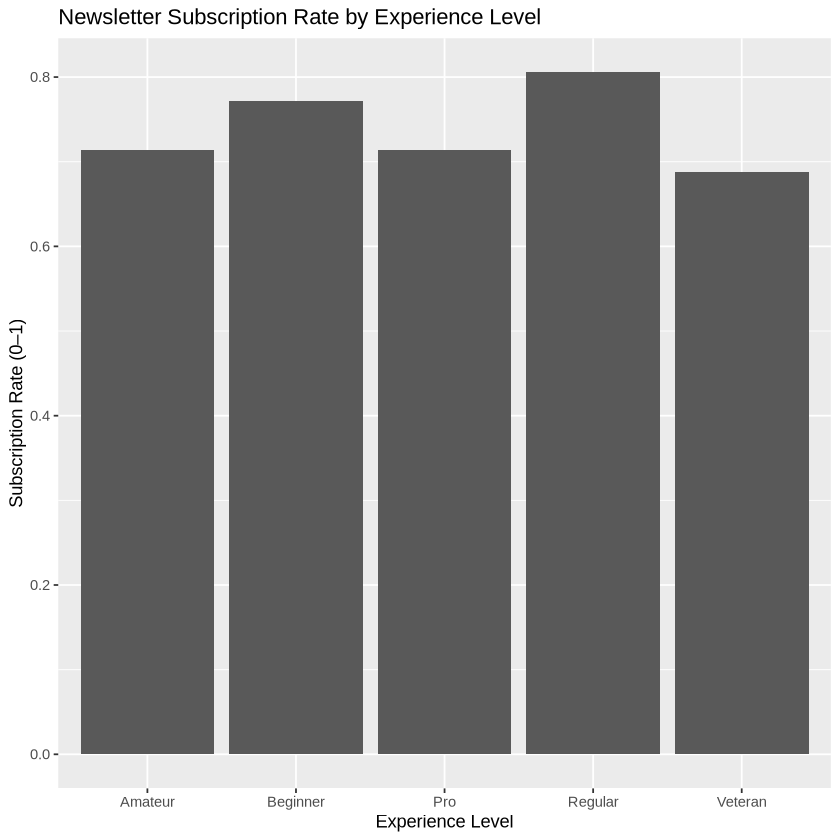

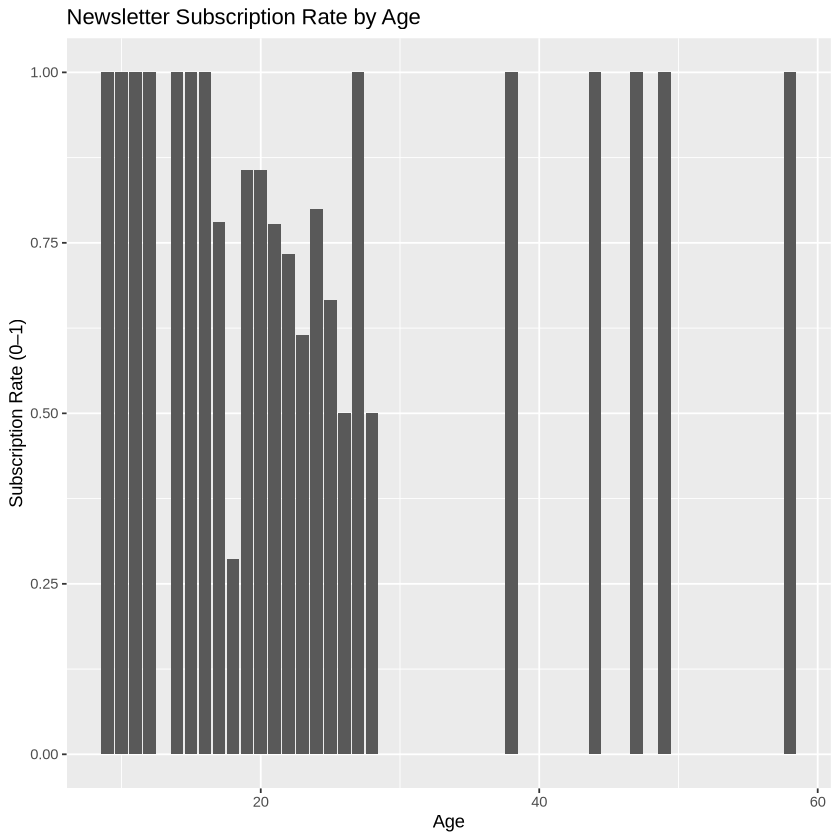

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


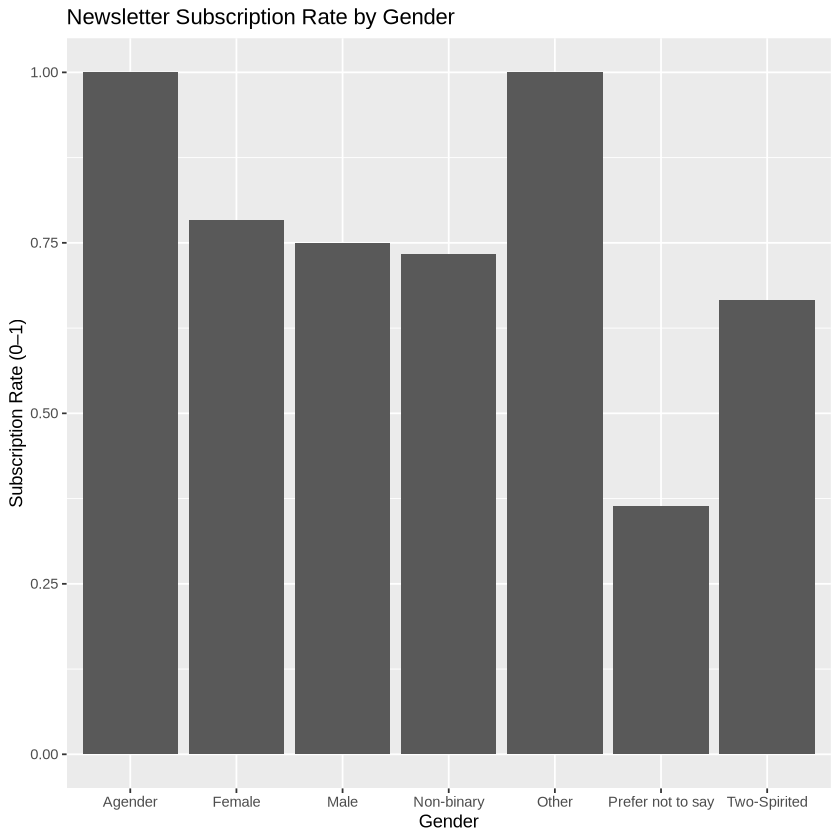

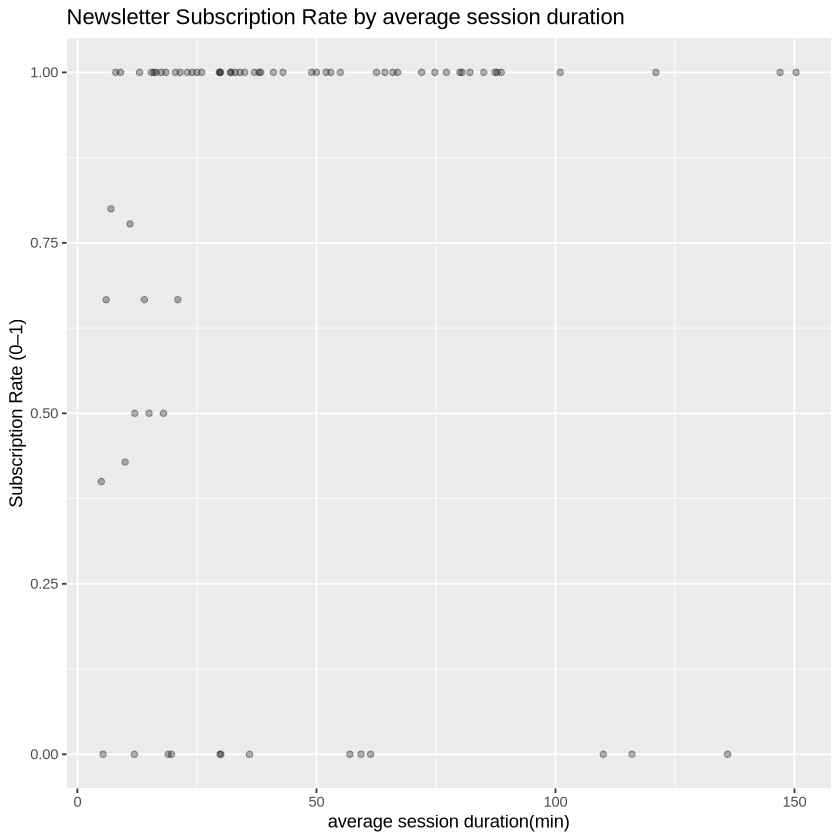

Warning message:
“Removed 73 rows containing missing values or values outside the scale range
(`geom_point()`).”


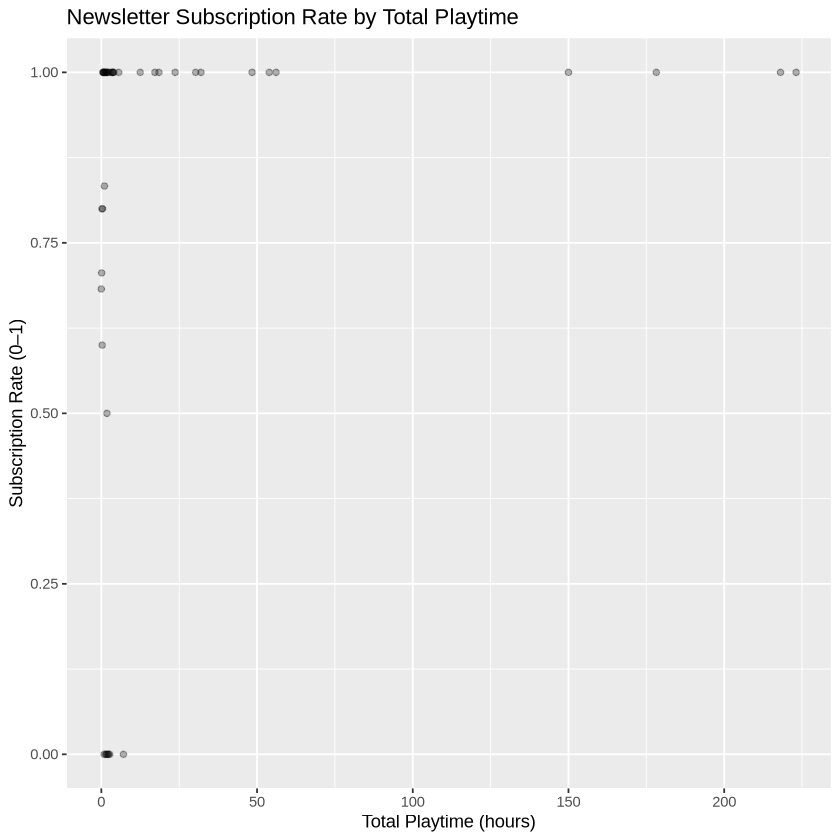

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


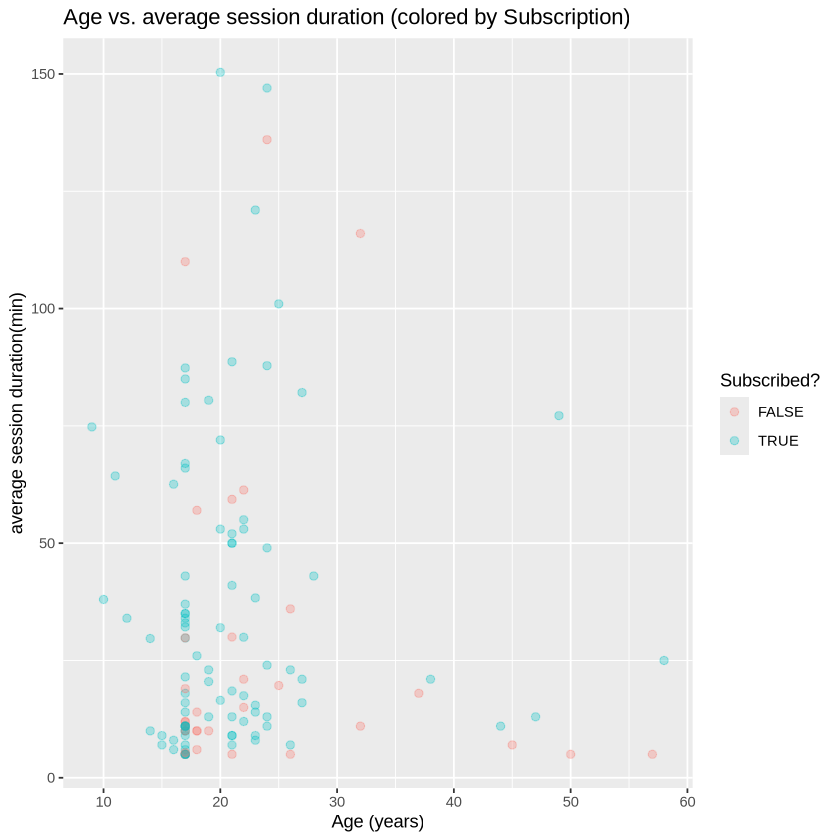

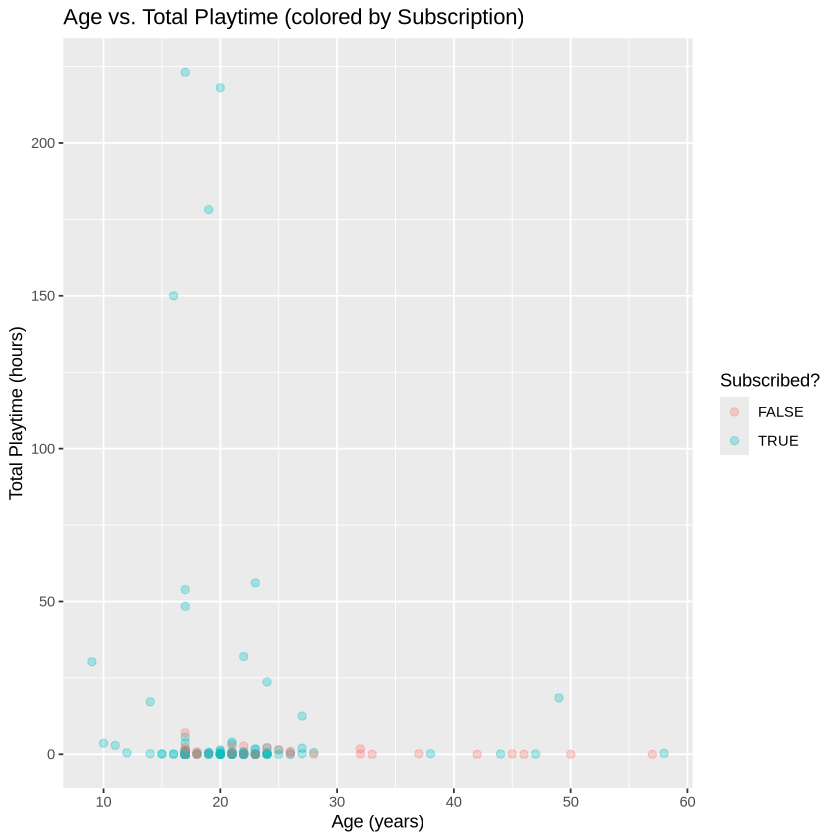

In [35]:
# exploratory visualizations
#merge with players.csv
session_summary <- sessions_tidy %>%
  group_by(hashedEmail) %>%
  summarise(
    avg_session_min = mean(duration_min, na.rm = TRUE),
    session_count = n(),
    .groups = "drop"
  )

players_extended <- left_join(players, session_summary, by = "hashedEmail")

players_extended
# Distribution of player age
ggplot(players, aes(x = Age)) +
  geom_histogram() +
  labs(title = "Distribution of Player Ages",
       x = "Age (years)",
       y = "Number of Players")

# Distribution of total playtime
ggplot(players, aes(x = played_hours)) +
  geom_histogram() +
  labs(title = "Distribution of Total Playtime",
       x = "Total Playtime (hours)",
       y = "Number of Players")

# Playtime by Experience
ggplot(players, aes(x = experience, y = played_hours)) +
  geom_point(alpha = 0.3) +
  labs(title = "Playtime by Experience Level",
       x = "Experience Level",
       y = "Played Hours") 

# Bar chart: Subscription rate by Experience
players |>
  group_by(experience) |>
  summarise(sub_rate = mean(subscribe, na.rm = TRUE)) |>
  ggplot(aes(x = experience, y = sub_rate)) +
  geom_col() +
  labs(title = "Newsletter Subscription Rate by Experience Level",
       x = "Experience Level",
       y = "Subscription Rate (0–1)")

# Bar chart: Subscription rate by Age
players |>
  group_by(Age) |>
  summarise(sub_rate = mean(subscribe, na.rm = TRUE)) |>
  ggplot(aes(x = Age, y = sub_rate)) +
  geom_col() +
  labs(title = "Newsletter Subscription Rate by Age",
       x = "Age",
       y = "Subscription Rate (0–1)")

# Bar chart: Subscription rate by gender
players |>
  group_by(gender) |>
  summarise(sub_rate = mean(subscribe, na.rm = TRUE)) |>
  ggplot(aes(x = gender, y = sub_rate)) +
  geom_col() +
  labs(title = "Newsletter Subscription Rate by Gender",
       x = "Gender",
       y = "Subscription Rate (0–1)")

# Scatter plot: Subscription rate by average session duration
players_extended |>
  group_by(avg_session_min) |>
  summarise(sub_rate = mean(subscribe, na.rm = TRUE)) |>
  ggplot(aes(x = avg_session_min, y = sub_rate)) +
  geom_point(alpha = 0.3) +
  labs(title = "Newsletter Subscription Rate by average session duration",
       x = "average session duration(min)",
       y = "Subscription Rate (0–1)")

# Scatter plot: Subscription rate by Playtime
players |>
  group_by(played_hours) |>
  summarise(sub_rate = mean(subscribe, na.rm = TRUE)) |>
  ggplot(aes(x = played_hours, y = sub_rate)) +
  geom_point(alpha = 0.3) +
  labs(title = "Newsletter Subscription Rate by Total Playtime",
       x = "Total Playtime (hours)",
       y = "Subscription Rate (0–1)")

# Scatter plot: Age vs average session duration, colored by Subscription
ggplot(players_extended, aes(x = Age, y = avg_session_min, color = subscribe)) +
  geom_point(size = 2, alpha = 0.3) +
  labs(title = "Age vs. average session duration (colored by Subscription)",
       x = "Age (years)",
       y = "average session duration(min)",
       color = "Subscribed?")


# Scatter plot: Age vs Playtime, colored by Subscription
ggplot(players, aes(x = Age, y = played_hours, color = subscribe)) +
  geom_point(size = 2, alpha = 0.3) +
  labs(title = "Age vs. Total Playtime (colored by Subscription)",
       x = "Age (years)",
       y = "Total Playtime (hours)",
       color = "Subscribed?")


### Insights from the Visualizations

- **Age and playtime** appear to be the most informative predictors of subscription. **Experience** shows a small positive trend.
- **gender** shows weaker or inconsistent effects.  
- Some groups (e.g., “Veteran” or “Other” gender) may have **small sample sizes**, leading to unstable proportions.  





## (4) Methods and Plan

### Proposed Method
I plan to use a **K-Nearest Neighbours (KNN)** classification model。
The goal is to predict whether a player subscribes to the newsletter (`subscribe`) based on demographic and behavioural features such as `Age`, `gender`, `experience`, `played_hours`, and `avg_session_min`.

### Why this method is appropriate
KNN makes predictions based on the similarity between observations.  
It does not assume any specific functional relationship between predictors and the response.  
This makes it suitable for our data, where the relationship between player behaviour and subscription likelihood may be nonlinear.

### Assumptions
- The data is representative of the population and independent across players.  
- Predictors are scaled or normalized, so no variable dominates distance calculations.  
- The dataset is relatively free of extreme outliers, which can distort distance measures.

### Potential Limitations
- Model performance depends on the choice of **k** (number of neighbours). Too small a k may overfit, while too large may oversmooth patterns.  
- Sensitive to irrelevant or highly correlated features.  
- KNN can be slower for larger datasets, since distances must be computed for each prediction.  
- It does not directly show which features are most influential, only overall accuracy.

### Model Comparison and Selection
I will tune the hyperparameter **k** using **cross-validation**, comparing accuracy scores for different values of k (e.g., k = 1–10).  
The best-performing k will be chosen based on the lowest cross-validation error or highest accuracy on validation folds.

### Data Processing Plan
Before modelling:
1. Select relevant variables: `subscribe` (response), `Age`, `gender`, `experience`, `played_hours`, and `avg_session_min` (predictors).  
2. Handle missing values and convert categorical variables (e.g., `gender`, `experience`) to factors.  
3. Normalize quantitative predictors (`Age`, `played_hours`, `avg_session_min`) to ensure fair distance computation.  
4. Split the dataset into **training (80%)** and **testing (20%)** sets.  
5. Use **5-fold cross-validation** on the training data to select the best k.  
6. Evaluate model accuracy on the test data.




## (5) GitHub Repository

https://github.com/Lissiu/dsci-100-2025w1-group-008-13